# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import pylab as pl
import numpy as np
import seaborn as sns 
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source
#and display the first 5 rows as an overview
df_raw = pd.read_csv("admissions.csv")
print(df_raw.head())

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [8]:
#Describe the table to get mean, median and other stats
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GPA scores range from 2.26 in this dataset to 4.0, while GRE scores range from 220 to 800. Standard deviation is a measure of the distance of the average datapoint from the mean of the dataset. Because the standard deviation is in the same units as the dataset, and is sensitive to the size of the values involved, it makes sense that a parameter with a larger range would tend to have a larger standard deviation.

#### Question 4. Drop data points with missing data


In [18]:
#Create a new dataframe for the processed data
df_clean = df_raw[((df_raw['gre'].isnull() == 0) & (df_raw['gpa'].isnull() == 0))]
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The count is the same for each variable, so all missing values have been removed.

#### Question 6. Create box plots for GRE and GPA

(300, 900)

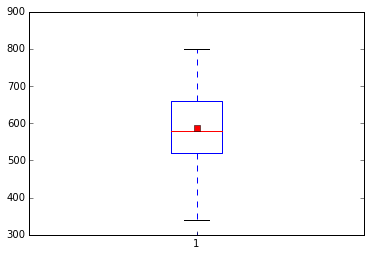

In [29]:
#boxplot for GRE
gre_boxplot = plt.boxplot(df_clean['gre'], showmeans = True)
plt.ylim([300,900])

(2.2, 4.2)

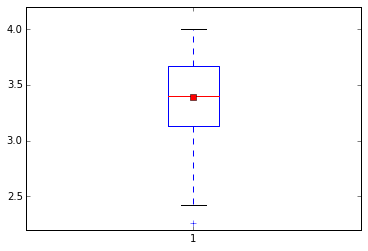

In [31]:
#boxplot for GPA
plt.boxplot(df_clean['gpa'], showmeans = True)
plt.ylim([2.2,4.2])

#### Question 7. What do this plots show?

Answer: 50% of GRE scores are in the range 520-660. The mean (588) is slightly above the median of this range, indicating that the data is skewed to the 4th quartile.

Similarly, 50% of GPA scores are in the relatively narrow range of 3.13-3.67. The box plot is striking because the 4th quartile is much smaller than the 1st quartile in terms of range. The fact the mean and median are very close in this plot suggests that the 1st quartile is large in terms of range, but sparsely populated, and that there is a skew in the 4th quartile.

#### Question 8. Describe each distribution 

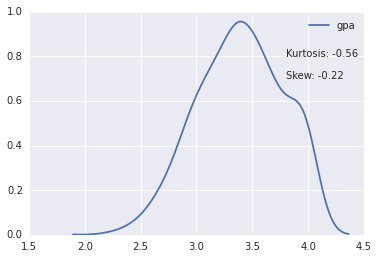

In [52]:
# plot the distribution of each variable 
#GPA
gpa_plot = sns.kdeplot(df_clean['gpa'])
kurtosis = round(df_clean['gpa'].kurt(),2)
skew = round(df_clean['gpa'].skew(),2)
gpa_plot.text(x=3.8, y=0.8, s="Kurtosis: " + str(kurtosis));
gpa_plot.text(x=3.8, y=0.7, s="Skew: " + str(skew));

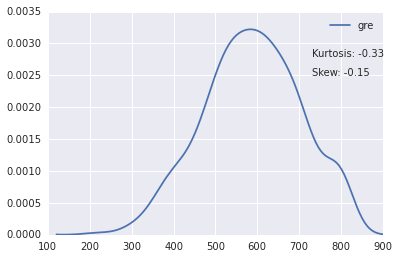

In [54]:
#GRE
gre_plot = sns.kdeplot(df_clean['gre'])
kurtosis = round(df_clean['gre'].kurt(),2)
skew = round(df_clean['gre'].skew(),2)
gre_plot.text(x=730, y=2.8e-3, s="Kurtosis: " + str(kurtosis));
gre_plot.text(x=730, y=2.5e-3, s="Skew: " + str(skew));

(array([  61.,    0.,    0.,  148.,    0.,    0.,  121.,    0.,    0.,   67.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

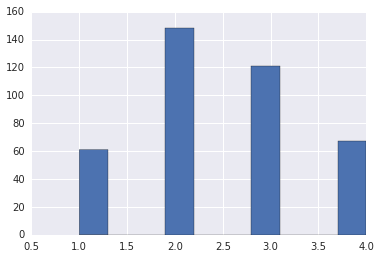

In [49]:
#Prestige
plt.hist(df_clean['prestige'])

(array([ 271.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  126.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

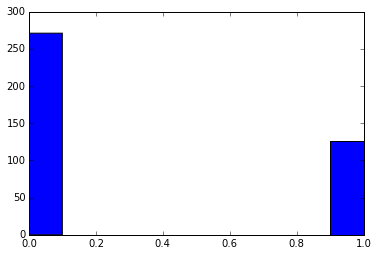

In [42]:
#Admit
plt.hist(df_clean['admit'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. The kurtosis and skew for GRE and GPA are slightly negative, indicating a slight flatness to the top of the curve, and a skew around 4.0GPA and 780-800 GRE (top of the range) suggesting that the max values are more common than might be expected in a normal distribution. However, the distribution of each of the variables is approximately normal.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The GRE and GPA values have a slight negative skew. Log-transforming the data will correct this.

#### Question 11. Which of our variables are potentially colinear? 

In [59]:
# create a correlation matrix for the data
df_clean.corr()
#sns.heatmap(df_clean.corr())

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: There is no very strong colinearity between any of the variables. It is not necessary to drop any variables due to potential colinearity. It should be noted, though, that GRE and GPA have a .38 colinearity score, indicating a moderately strong association. This analysis is borne out by the similar distribution plots for GRE and GPA above.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

In [70]:
#Clean the data to remove null values as above
#Describe the dataset
#Create a correlation matrix
#Evaluate a single-variable regression as below
prestige_reg=sm.ols(data=df_clean, formula='admit~prestige').fit()
prestige_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Sun, 19 Jun 2016   Prob (F-statistic):           9.02e-07
Time:                        23:37:44   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000         0.490     0.741
prestige      -0.1199      0.024     -4.991      0.000        -0.167    -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 14. What is your hypothesis? 

Answer: Based on the low correlation coefficient between prestige and the admit status, I hypothesize that prestige is a poor predictor of graduate school admissions at UCLA.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Answer: Generally, it is preferable to replace or "impute" missing values so that data does not need to be removed from the dataset. The number of records removed here is small but with low-quality or semi-structured data, partial obervations can account for a significant portion of all data.

One method to replace missing data is to fill that field with the median value for the column. This slightly lowers the variance of that parameter, but in general has no ill effects. 

A more complex version of this method is to identify the median value for a subset of observations similar to the partial observation. For example, in the code below, one could fill row 187 with the median GRE and GPA for all rows where Prestige = 2. This is a slight improvement over the more general method above in that the amended row becomes more "typical" compared to others of it's kind.

In [7]:
#example of missing data
df_temp = df_clean = df_raw[(df_raw['gre'].isnull() == 1)]
df_temp.head()

,admit,gre,gpa,prestige
187,0,NaN,NaN,2
212,0,NaN,2.87,2


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data